<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Обоснование" data-toc-modified-id="Обоснование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Обоснование</strong></a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd #импортируем нужные библиотеки
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('/datasets/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [3]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [4]:
df.isna().sum()#проверим данные на пропуски

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

В таблице присутствуют 5 столбцов - пол , возраст , зарплата , члены семьи  и  Страховые выплаты . Данные распрделены нормально , отрицательных значений нет , пропусков нет. 

In [5]:
features=df.drop(['Страховые выплаты'],axis=1) #разделим признаки #определим тест. и трен. выборки
target=df['Страховые выплаты']

In [6]:
train_features, test_features, train_target, test_target=train_test_split(features,target, test_size=0.25, random_state=254)

In [7]:
train_v=train_features.shape[0]/features.shape[0]
test_t=test_target.shape[0]/target.shape[0]

print('Размер тренировочной выборки- {:.0%}'.format(train_v))
print('Размер тестовой выборки - {:.0%}'.format(test_t))

Размер тренировочной выборки- 75%
Размер тестовой выборки - 25%


Проверим данные на мультиколлениарность (мультиколлениарность-явление, при котором наблюдается сильная корреляция между признаками) с помощью метода построения тепловой карты .Пороговое значение возьмем от 0.7-1.0

<bound method DataFrame.corr of       Пол  Возраст  Зарплата  Члены семьи  Страховые выплаты
0       1     41.0   49600.0            1                  0
1       0     46.0   38000.0            1                  1
2       0     29.0   21000.0            0                  0
3       0     21.0   41700.0            2                  0
4       1     28.0   26100.0            0                  0
...   ...      ...       ...          ...                ...
4995    0     28.0   35700.0            2                  0
4996    0     34.0   52400.0            1                  0
4997    0     20.0   33900.0            2                  0
4998    1     22.0   32700.0            3                  0
4999    1     28.0   40600.0            1                  0

[5000 rows x 5 columns]>


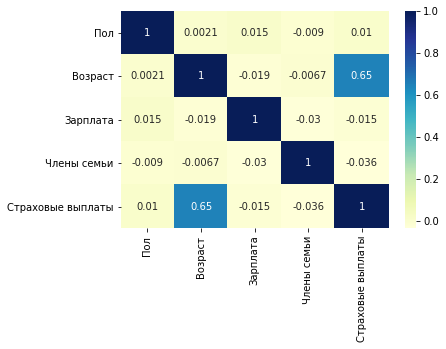

In [8]:
print((df.corr))
df_plot=sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

ВОПРОС: Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии?

ОТВЕТ: не изменится.



$$**Алгоритм**

Формула умножения матриц (Возможна если ширина матрицы А = высоте матрицы Р, при А(3750,4)*Р(4,4)=М(3750,4):

$$
A*P=M
$$

В каждую новую ячейку записываем результат сложения произведения строк i на столбцы j , так/по такой формуле будет выглядеть первая ячейка:

$$
M_{11}=A_{11}*P_{11}+A_{12}*P_{21}+A_{13}*P_{31}+A_{14}*P_{41}
$$

Вычислим параметр w , где X-таблица признаков , где нулевой столбец заполнен 1 ,у-вектор целевого признака:

$$
w = (X^TX)^{-1}X^Ty
$$
$$
X_i(1(M_{i2}M_{i3}M_{i4}M_{i5}))
$$
 

Напишешм формулу дял вычисления предсказания линейной регресии, где w-величина сдвига модели,w_0-значение нулевого аргумента вектора w:

$$
a=X_w+w_0
$$
$$
a=X_iw=X_i(X^TX)^{-1}X^Ty
$$


Упростим:

$$
a=X_i(X^TX)^{-1}X^Ty=X_iX^{-1}(X^T)^{-1}X^{-1}y=X_iX^{-1}y
$$

Домножим нашу матрицу на измененные признаки , где P обратимая матрица ,из P получили P-1,а P^P-1=E, а wi-это новый коэфицент:

$$
w' = ((XP)^T(XP))^{-1}(XP)^Ty=((XP)^T)(XP)^{-1}(XP)^T=(XP)^{-1}y
$$


Подставляем их в формулу предсказания и упрощаем выражение:

$$
a'= X_iPw' = X_iP((XP)^T(XP))^{-1}(XP)^Ty = X_iP(XP)^{-1}((XP)^T)^{-1}(XP)^Ty = X_iX^{-1}y
$$

Итог:

$$
a=a_i
$$

Создадим класс линейной регрессии.

In [9]:
class LinearReg: 
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Обучим модель и получим метрики качеств.

In [10]:
model = LinearReg()
model.fit(train_features, train_target)
predict = model.predict(test_features)

R2_score = r2_score(test_target, predict)
MSE = mean_squared_error(predict,test_target)

print("R2_score:", R2_score.round(2))
print("MSE:", MSE.round(2))

R2_score: 0.42
MSE: 0.11


Создадим экземпляр класса из класса линейной модели , обучим модель, поулучим метрики качества,предсказания .

In [11]:
model_l = LinearRegression() #Вычислим значения R2 и MSE для предсказанных значений по исходным данным
model_l.fit(train_features,train_target)
predictions= model_l.predict(test_features)

R2_score_l = r2_score(test_target, predictions)
MSE_l = mean_squared_error(predictions,test_target)

print("R2_score Линейной регрессии неизменённой матрицы:", R2_score_l.round(2))
print("MSE Линейной регрессии неизменённой матрицы:", MSE_l.round(2))

R2_score Линейной регрессии неизменённой матрицы: 0.42
MSE Линейной регрессии неизменённой матрицы: 0.11


Создадим новую матрицу со случайными величинами.

In [12]:
matrix=np.random.normal(3, size=(4,4))
matrix #Произведём изменение признаков исходной матрицы данных методом умножения их на произвольную обратимую матрицу

array([[4.36161627, 2.19855113, 2.40531052, 2.9598406 ],
       [2.61490434, 3.68239691, 3.51686695, 3.1229949 ],
       [2.35209224, 2.52947353, 2.34279579, 3.65173196],
       [2.28445416, 3.43096484, 3.1552701 , 3.13204087]])

Проверим новую матрицу на обратимость.

In [13]:
np.linalg.inv(matrix)

array([[  0.61035363,  -1.70156838,  -0.73550277,   1.9774004 ],
       [  1.04235984,  -9.71971068,  -3.14673108,  12.37544718],
       [ -1.2897695 ,  11.09674464,   2.88708476, -13.21196823],
       [ -0.287689  ,   0.70941409,   1.07502231,  -1.36961058]])

In [14]:
train_matrix=train_features.dot(matrix)#умножим на произвольнуюматрицу (трен.выборка)
train_matrix.columns = train_features.columns
train_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
883,92729.631515,99742.018561,92383.163534,143946.954063
4736,117268.969700,126153.848985,116849.117317,182015.370120
4455,97459.965029,104837.789599,97103.923780,151281.647927
3993,116968.387868,125808.841709,116526.916065,181572.122052
651,95825.583636,103084.815813,95480.466273,148741.077670


In [15]:
test_matrix = test_features.dot(matrix) #умножим на произвльную (тест.выборка)
test_matrix.columns = test_features.columns
test_matrix.head()

,Пол,Возраст,Зарплата,Члены семьи
4948,89482.902472,96261.872514,89161.924612,138887.457082
4959,81268.760820,87438.903868,80990.301055,126131.569481
1728,88987.533624,95724.571513,88663.186805,138129.157844
4169,103329.736000,111146.743848,102946.845783,160398.485842
1984,105012.148325,112968.426015,104635.315778,162998.438233


In [16]:
model_t = LinearRegression() # проверим результат
model_t.fit(train_matrix,train_target)
predictions_t= model_t.predict(test_matrix)
print("R2_score Линейной регрессии изменённой матрицы:", r2_score(test_target,predictions_t).round(2))
print("MSE Линейной регрессии изменённой матрицы:", mean_squared_error(predictions_t,test_target).round(2))

R2_score Линейной регрессии изменённой матрицы: 0.42
MSE Линейной регрессии изменённой матрицы: 0.11


При умножении матриц метрики качесвта R2 и MSE получились одинаковые .

## Алгоритм преобразования

1.Создаём рандомную матрицу P

2.Проверяем её на обратимость

3.Создаём новую матрицу данных M

4.Ищем метрики качества на исходных и преобразованных данных

5.Опишем вывод результатов

## **Обоснование**

При умножении признаков тестовой и тренировочной выборк на одну и ту же обратимую матрицу , резултат предсказания будет = произведению измененной таблицы с признаками на вектор из таблицы с измененными данными и увеличенную на признаки и величину ,что и признаки тренировочный данных.


## Проверка алгоритма

Сначала создадим рандомную матрицу и проверим ее на обратимость.

In [17]:
P = np.random.normal(3, size=(4,4)) #создадим матрицу P
P

array([[3.1564232 , 4.29057588, 0.96884947, 3.47508029],
       [4.69845924, 5.65868205, 2.95383459, 1.86338973],
       [3.45251178, 4.2490054 , 4.200851  , 1.36846148],
       [3.10542638, 3.40705244, 4.17695218, 1.84929438]])

In [18]:
np.linalg.inv(P) #проверим обратимость 

array([[-0.69583598,  1.43164364, -2.69460486,  1.8590003 ],
       [ 0.4786393 , -0.74549407,  2.12405772, -1.72003723],
       [-0.02130005, -0.3286559 ,  0.39732008,  0.07717331],
       [ 0.33476957, -0.28829729, -0.28576631,  0.41362764]])

Матрица создана и она обратима.
Выполним умножение признаков на нашу новую матрицу М

In [19]:
M =train_features.dot(P)#тренировочная выборка
M.columns = train_features.columns
M.head()

,Пол,Возраст,Зарплата,Члены семьи
883,136130.737148,167533.052049,165579.736901,53958.362817
4736,172171.572927,211885.441859,209352.263524,68246.012209
4455,143082.745297,176087.649665,174010.977248,56713.919676
3993,171708.860268,211319.074268,208858.332560,68062.581318
651,140684.700250,173134.884408,171088.820073,55765.271302


Применим те же изменения для тестовой выборки и умножим на ту же матриц

In [20]:
test_M = test_features.dot(P)#тестовая выборка
test_M.columns = test_features.columns
test_M.head()

,Пол,Возраст,Зарплата,Члены семьи
4948,131375.552429,161679.273981,159746.775703,52075.806060
4959,119326.111815,146847.637762,145073.082215,47299.444019
1728,130645.899009,160782.164498,158880.782859,51783.745661
4169,151695.230907,186687.528431,184501.289411,60127.619819
1984,154174.581515,189736.550499,187485.685031,61111.602121


Целевые признаки оставляем без изменений.
Далее в нулевой столбец нашей изменённой таблицы вносим значение 1

In [21]:
X = np.concatenate((np.ones((M.shape[0], 1)), M), axis=1)
pd.DataFrame(X).head()

,0,1,2,3,4
0,1.0,136130.737148,167533.052049,165579.736901,53958.362817
1,1.0,172171.572927,211885.441859,209352.263524,68246.012209
2,1.0,143082.745297,176087.649665,174010.977248,56713.919676
3,1.0,171708.860268,211319.074268,208858.332560,68062.581318
4,1.0,140684.700250,173134.884408,171088.820073,55765.271302


In [22]:
y = train_target
w = (np.linalg.inv(X.T.dot(X)).dot(X.T)).dot(y) #вычислим вестор w

In [23]:
a = test_M.dot(w[1:]) + w[0] #вычислим предсказаня модели

In [24]:
R2_score_m=r2_score(test_target, a) #проверим значения R2 и MSE
MSE_m=mean_squared_error(a, test_target)
print("R2_score:",R2_score_m.round(2))
print("MSE:", MSE_m.round(2))

R2_score: 0.42
MSE: 0.11


Сравним R2 и MSE измененной/неизмененной матрицы признаков

In [25]:
comparison_t = pd.DataFrame(index=['R2_score','MSE'], columns=['Изменённая матрица','Неизменённая матрица'])
comparison_t['Изменённая матрица'] = R2_score_m, MSE_m
comparison_t['Неизменённая матрица'] = R2_score_l, MSE_l

comparison_t.T

,R2_score,MSE
Изменённая матрица,0.416687,0.112489
Неизменённая матрица,0.416687,0.112489


## Вывод

Наша задача была - защитить данные клиентов страховой компании "Хоть потоп" и разработать метод преобразования / шифрования данных чтобы было сложно по ним восстановить персональную информацию. При этом, резултат работы нашего алгоритма , не должен был ухудшить качество моделей машинного обучения .

В ходе работы с данными выяснили , что качество линейной регресии не изменилось (от использования исходной матрицы и исходной матрицы, умноженную на обратимую).Создали алгоритм преобразования данных. Проверили метрики R2 (0.42) и MSE  (0.11) для данных (без преобразования и с ним). Метрики в обоих случаях показали одинаковые результаты.
По результатам работы использования матричных операций можно увидеть, что данные  зашифровать от распознования не сложно, имея правильную матрицу.